### Гудманов Елизар Игоревич
### почта: egudmanov-21@edu.ranepa.ru
### логин GitHub: ElizarGudmanov

In [1]:
# Библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# 1 балл (сумма 1)
# Скачать olimpic.csv.zip (архив распаковывать не нужно)
olimpic = pd.read_csv('olimpic.csv.zip')
display(olimpic)

# Скачать region.csv
region = pd.read_csv('region.csv')
display(region)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [3]:
# 1 балл (сумма 2) 
# Слить две таблицы в одну, следующим образом - к olympics добавить два столбца (region, notes), 
# ключевой столбец NOC
# вывести первые и последние три строки таблицы

yanka = pd.merge(olimpic, region, on = "NOC", how = 'left')
display(yanka.head(3))
display(yanka.tail(3))

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [4]:
# 1 балл (сумма 3) 
# найти общее количество золотых медалей для зимней, летней олимпиады и суммарно летней и зимней 
# на выходе должен быть DataFrame 
katushka1 = yanka[yanka['Season']=='Winter'].groupby('Medal').size().loc['Gold']
katushka2 = yanka[yanka['Season']=='Summer'].groupby('Medal').size().loc['Gold']
gold = {'Summer':[katushka1], 'Winter':[katushka2], "Sum":[(katushka1 + katushka2)]}

pd.DataFrame(data=gold)


,Summer,Winter,Sum
0,1913,11459,13372


<AxesSubplot:xlabel='Age', ylabel='Count'>

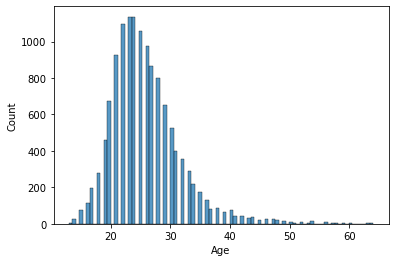

In [5]:
# 1  балл (сумма 4)
# построить распределения количества золотых медалистов в зависимости от их возраста 
# важно: отображение количества медолистов, только в виде столбцов
# внимание: возраст обязательно целые числа,
penguins = yanka[yanka['Medal']=='Gold']

#penguins['Age'].astype(int)
sns.histplot(data=penguins, x="Age")

42

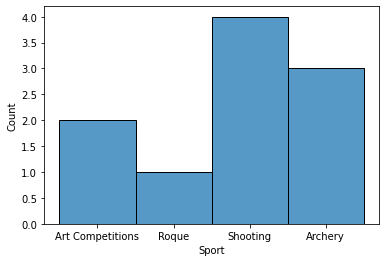

In [6]:
# 1 балл (сумма 5) 
# сколько олимпийских чемпионов было страше 60 лет (включая 60)
# построить столбцовую гистограмму по видам спорта (Sport) для золотых медалистов старше 60
elizar = yanka[yanka['Age']>=60].dropna(subset = ['Medal']).shape[0]
philipp = yanka[yanka['Age']>=60]
sns.histplot(data=philipp[philipp['Medal']=='Gold'], x="Sport")
elizar

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '1900'),
  Text(1, 0, '1904'),
  Text(2, 0, '1906'),
  Text(3, 0, '1908'),
  Text(4, 0, '1912'),
  Text(5, 0, '1920'),
  Text(6, 0, '1924'),
  Text(7, 0, '1928'),
  Text(8, 0, '1932'),
  Text(9, 0, '1936'),
  Text(10, 0, '1948'),
  Text(11, 0, '1952'),
  Text(12, 0, '1956'),
  Text(13, 0, '1960'),
  Text(14, 0, '1964'),
  Text(15, 0, '1968'),
  Text(16, 0, '1972'),
  Text(17, 0, '1976'),
  Text(18, 0, '1980'),
  Text(19, 0, '1984'),
  Text(20, 0, '1988'),
  Text(21, 0, '1992'),
  Text(22, 0, '1996'),
  Text(23, 0, '2000'),
  Text(24, 0, '2004'),
  Text(25, 0, '2008'),
  Text(26, 0, '2012'),
  Text(27, 0, '2016')])

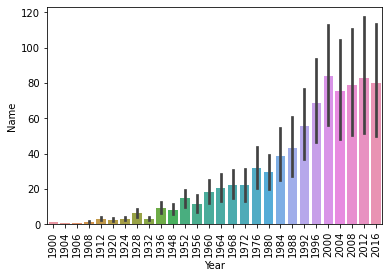

In [68]:
# 1  балл (сумма 6)
# построить столбцовый график - количество женщин по годам участвовавших в летних олимпиадах по годам
# важно, подумать ...
yura = yanka[(yanka['Sex']=='F')&(yanka['Season']=='Summer')].drop_duplicates(subset='Name')
yura = yura.groupby(['Year', 'Age'])['Name'].count().reset_index()
sns.barplot(data=yura, x="Year", y='Name')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

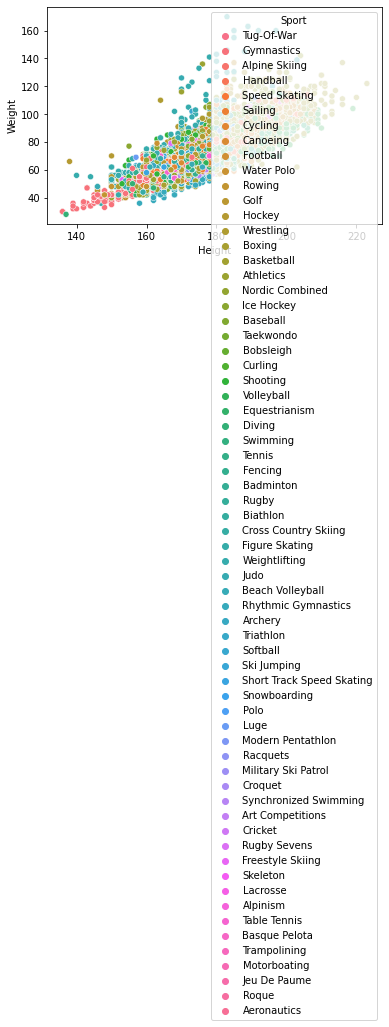

In [52]:
# 1 балл (сумма 7) 
# в виде точек визуализировать зависимость роста и веса для золотых медалистов
# на данном графике выделить баскетболистов (Basketball) среди всех спортсменов

sns.scatterplot(data = yanka[yanka['Medal']=='Gold'],
                x='Height',
                y='Weight',
                hue='Sport')

In [12]:
# 1 балл (сумма 8) 
# создать отдельную таблицу для зимних олимпийских игр с 1970 по 1990 в которой
# перрекодировать медали 'Gold':3 , 'Silver': 2, 'Bronze': 1
#
#
# 1 балл (сумма 9)
# использую полученную таблицу,
# найти СПИСОК 5 команд набравщих суммарно больше всех баллов в медальном зачете
#
#
# 1 балл (сумма 10)
# Найти в каком году и в каком городе было получено больше всего очков странами из данного списка. 
# Результат представить в виде таблицы (DataFrame)
# Индекс номер по порядку (см. ниже как упорядочить) 
# Cтолбцы - страна из списка, год, город, количество баллов в медальном зачете 
# Упорядочить по количеству баллов в медальном зачете



In [47]:
display(yanka.head(3))

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [80]:
marta = yanka[(yanka['Year']>=1970)&(yanka['Year']<=1990)&(yanka['Season']=='Winter')]
dict_medal ={'Gold':3, 'Silver':2, 'Bronze':1}
marta['Medal'] = marta['Medal'].replace(dict_medal)
display(marta.head(2))
rusik = marta.groupby('Team')['Medal'].sum().nlargest(5)
list(rusik.index)

C:\Users\katve\AppData\Local\Temp/ipykernel_16288/669947254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marta['Medal'] = marta['Medal'].replace(dict_medal)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN


['Soviet Union', 'East Germany', 'United States', 'Finland', 'Sweden']